In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### Load Dataset

In [111]:
df_ori = pd.read_csv('/content/Data_Negara_HELP.csv')
df_ori.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [112]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [113]:
df_ori.shape

(167, 10)

Analysis:

There are 167 rows of data and 10 columns. The following columns are available:
- Country : Country name
- Child_mortality: Death of child under 5 years old per 1000 births
- Export : Export of goods and services per capita
- Health: Total health expenditure per capita
- Imports: Imports of goods and services per capita
- Income: Net income per person
- Inflation: Measurement of the annual growth rate of Total GDP
- Life_expectancy: The average number of years a newborn child would live if current mortality patterns remained the same
- Fertility_total: The number of children that would be born to each woman if the current age fertility rate remained the same
- GDP per capita: GDP per capita. It is calculated as Total GDP divided by the total population.

### EDA (Multivariate)

<ipython-input-114-861ad4581437>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ori.corr(), annot=True, fmt='.2g')


<Axes: >

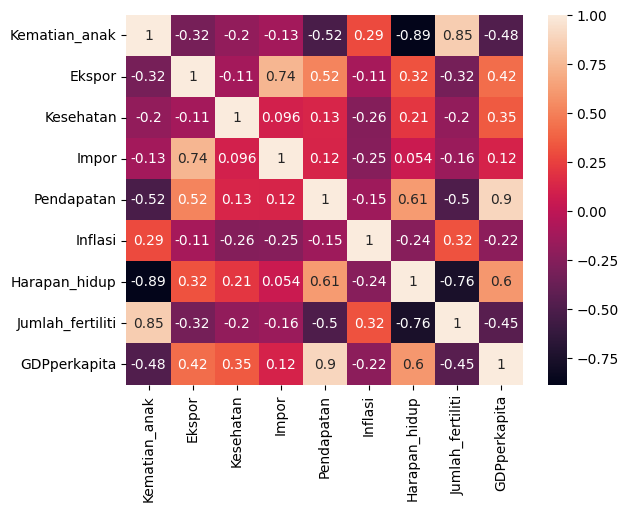

In [114]:
sns.heatmap(df_ori.corr(), annot=True, fmt='.2g')

Analysis :

On the heatmap, each colored cell or box represents the level of correlation between two variables. The closer the color intensity is to 1 (dark red), the higher the positive correlation between the two variables. Meanwhile, the closer the color intensity is to -1 (dark blue), the higher the negative correlation between the two variables. If the correlation between the two variables is close to 0, the color used will be close to neutral (white or yellow).

### Feature Selection

In [115]:
df=df_ori[['Kematian_anak', 'Pendapatan']]
df.dtypes

Kematian_anak    float64
Pendapatan         int64
dtype: object

<ipython-input-116-27527c88a16d>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Kematian_anak'], df['Pendapatan'], cmap='coolwarm')


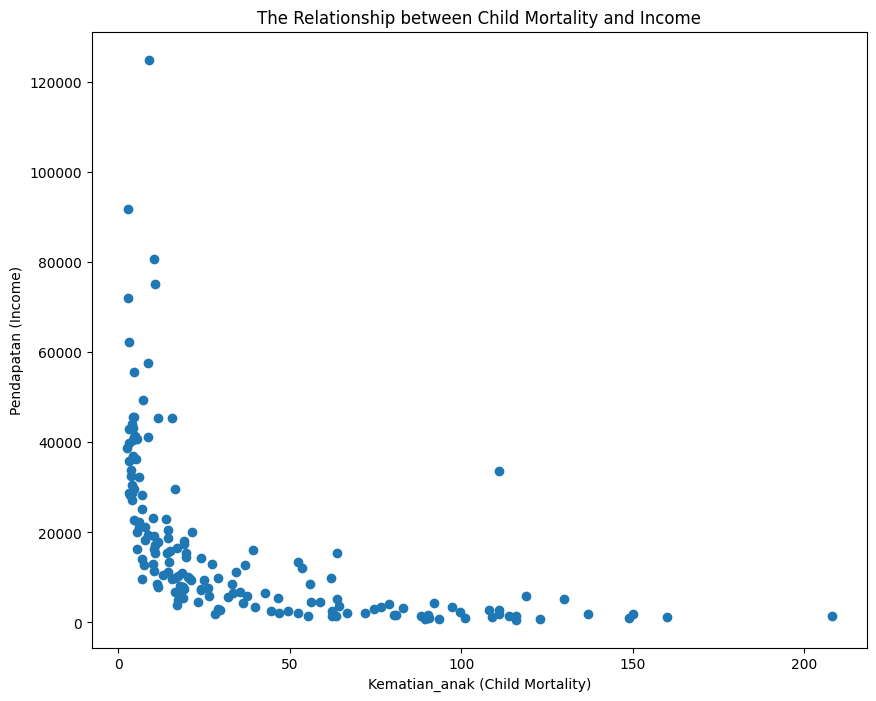

In [116]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Kematian_anak'], df['Pendapatan'], cmap='coolwarm')

plt.xlabel('Kematian_anak (Child Mortality)')
plt.ylabel('Pendapatan (Income)')
plt.title('The Relationship between Child Mortality and Income')

plt.show()

Analysis :  
The features selected for socio-economic and health factors are Child Mortality and Income. It means Child_mortality shows the death rate of children under 5 per 1000 births. So, the higher the death rate, the lower the health level. While income is net income per person, the lower the income value, the lower the economic level.

### 2.4 Data Cleaning


1. Missing values


In [117]:
df.isnull()

,Kematian_anak,Pendapatan
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
162,False,False
163,False,False
164,False,False
165,False,False


In [118]:
df.isnull().sum()

Kematian_anak    0
Pendapatan       0
dtype: int64

In [119]:
df['Kematian_anak'].unique()

array([ 90.2,  16.6,  27.3, 119. ,  10.3,  14.5,  18.1,   4.8,   4.3,
        39.2,  13.8,   8.6,  49.4,  14.2,   5.5,   4.5,  18.8, 111. ,
        42.7,  46.6,   6.9,  52.5,  19.8,  10.5,  10.8, 116. ,  93.6,
        44.4, 108. ,   5.6,  26.5, 149. , 150. ,   8.7,  15.7,  18.6,
        88.2,  63.9,  10.2,   3.6,   3.4,   4.1,  34.4,  25.1,  29.1,
        19.2,  55.2,  24.1,   3. ,   4.2,  63.7,  80.3,  16.5,  74.7,
         3.9,  14.6,  35.4, 109. , 114. ,  37.6, 208. ,   6. ,   2.6,
        58.8,  33.3,  19.3,  36.9,   4.6,   4. ,   3.2,  21.1,  21.5,
        62.2,  62.7,  29.6,  78.9,   7.8,  99.7,  89.3,   6.1,   2.8,
        10.4,  90.5,   7.9,  13.2, 137. ,   6.8,  97.4,  15. ,  40. ,
        17.2,  26.1,  33.5, 101. ,  64.4,  56. ,  47. ,   6.2, 123. ,
       130. ,  11.7,  92.1,  19.7,  20.3,  31.9,   9. ,  11.5,  10. ,
        63.6,  18.9,  66.8,   7.6,  14.4, 160. ,   7. ,  28.1,  53.7,
         3.8,  11.2,  20.7,  76.7,  52.4,  71.9,  14.9,  62.6,  90.3,
        17.4,  19.1,

In [120]:
df['Pendapatan'].unique()

array([  1610,   9930,  12900,   5900,  19100,  18700,   6700,  41400,
        43200,  16000,  22900,  41100,   2440,  15300,  16200,   7880,
         1820,   6420,   5410,   9720,  13300,  14500,  80600,   1430,
          764,   2520,   2660,  40700,   5830,    888,   1930,  19400,
         9530,  10900,   1410,    609,   5190,  13000,   2690,  20100,
        33900,  28300,  44000,  11100,   9350,   9860,   7300,  33700,
         1420,  22700,   7350,  39800,  36900,  15400,   1660,   6730,
        40400,   3060,  28700,  11200,   6710,   1190,   1390,   5840,
         1500,  22300,  38800,   4410,   8430,  17400,  12700,  45700,
        29600,  36200,   8000,  35800,   9470,   2480,   1730,  75200,
         2790,   3980,  18300,  16300,   2380,    700,  21100,  91700,
        11400,   1030,  10500,   1870,   3320,  15900,   3340,   3910,
         7710,  14000,   6440,    918,   3720,   8460,   1990,  45500,
        32300,    814,   5150,  62300,  45300,   4280,   7290,   9960,
      

Analysis :    
There is no data null in the data frame.

2. Outliers

In [121]:
def finding_outlier_IQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_final = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
  return df_final

def winsorization_outlier(data, percentile):
    threshold = np.percentile(data, percentile)
    data_winsorized = data.copy()
    data_winsorized[data_winsorized > threshold] = threshold
    return data_winsorized

In [122]:
print(finding_outlier_IQR(df['Kematian_anak']))
print(finding_outlier_IQR(df['Pendapatan']))

31     149.0
32     150.0
66     208.0
132    160.0
Name: Kematian_anak, dtype: float64
23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64


Text(0.5, 1.0, 'Box Plot Income')

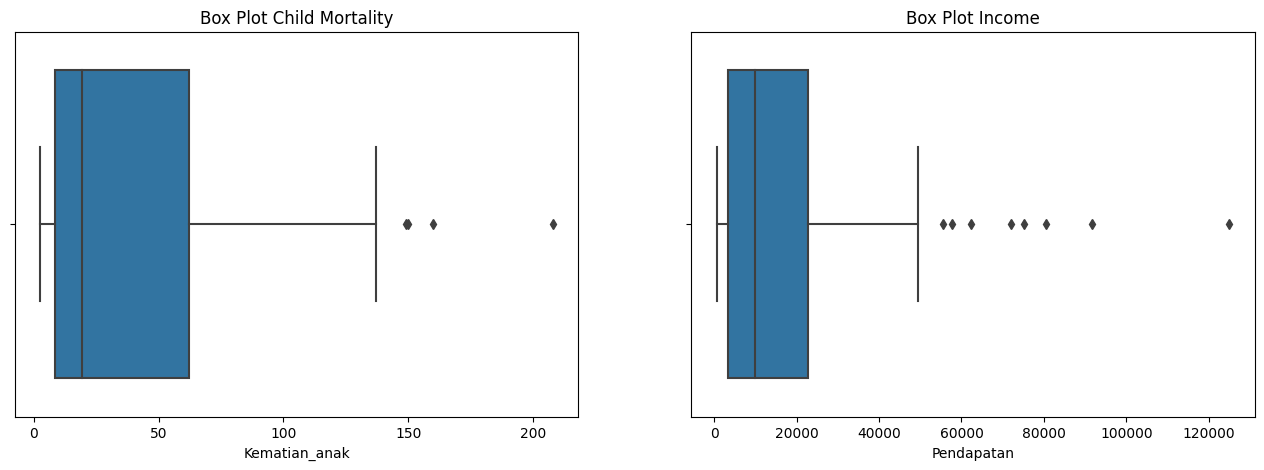

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.boxplot(x='Kematian_anak', data=df, ax=ax[0])
ax[0].set_title('Box Plot Child Mortality')

sns.boxplot(x='Pendapatan', data=df, ax=ax[1])
ax[1].set_title('Box Plot Income')

In [124]:
df['Kematian_anak'] = winsorization_outlier(df['Kematian_anak'], 95)
df['Pendapatan'] = winsorization_outlier(df['Pendapatan'], 95)

<ipython-input-124-8942f0158b52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kematian_anak'] = winsorization_outlier(df['Kematian_anak'], 95)
<ipython-input-124-8942f0158b52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pendapatan'] = winsorization_outlier(df['Pendapatan'], 95)


Text(0.5, 1.0, 'Box Plot Income')

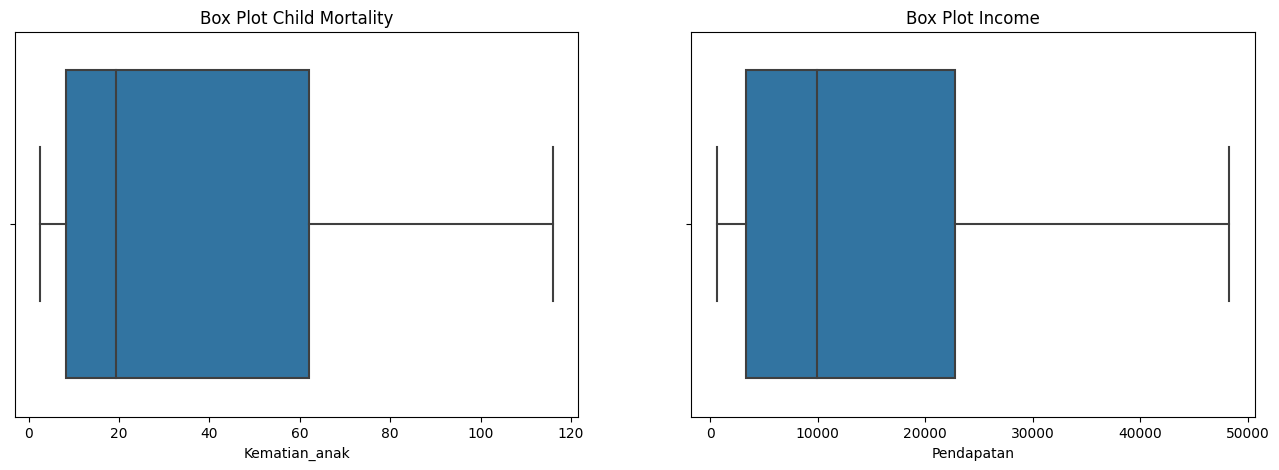

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.boxplot(x='Kematian_anak', data=df, ax=ax[0])
ax[0].set_title('Box Plot Child Mortality')

sns.boxplot(x='Pendapatan', data=df, ax=ax[1])
ax[1].set_title('Box Plot Income')

Analysis:

There are outliers in both columns. This outlier handling is done by the Winsorization Method. It is because Winsorization replaces outlier values with some cut-off values (e.g., a specific percentile value), thus retaining the information from the original data. Additionally, Winsorization can help reduce their influence on the analysis if the data has very extreme outliers without completely losing those extreme values.

### 2.5 EDA

Univeriate

Text(0.5, 1.0, 'Histogram Child Mortality')

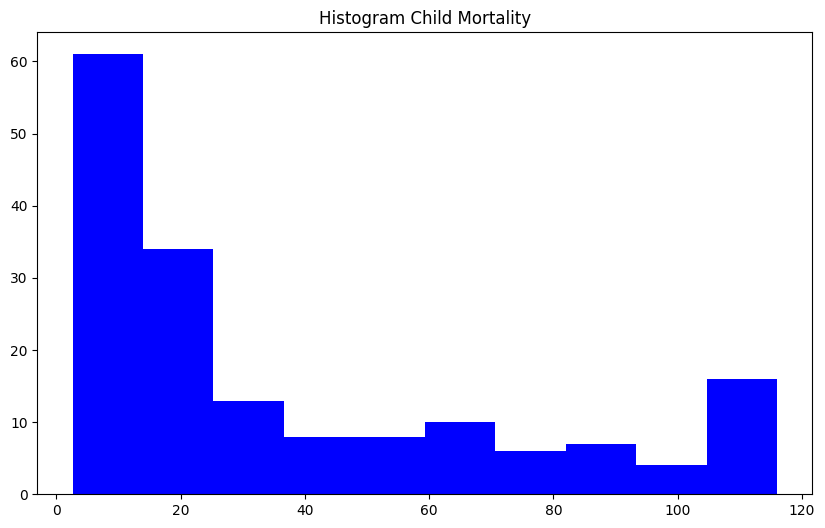

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df['Kematian_anak'], color='blue', bins=10)
ax.set_title('Histogram Child Mortality')

Text(0.5, 1.0, 'Histogram Income')

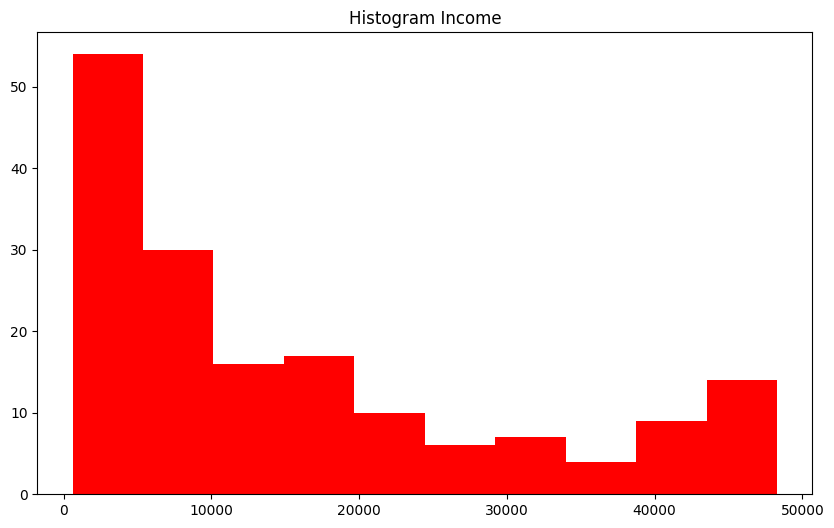

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df['Pendapatan'], color='red', bins=10)
ax.set_title('Histogram Income')

Analysis :   
From the graph it can be seen that the number of child mortality is around 10 very high. In terms of income, most countries have an income of around 5000.

Bivariate

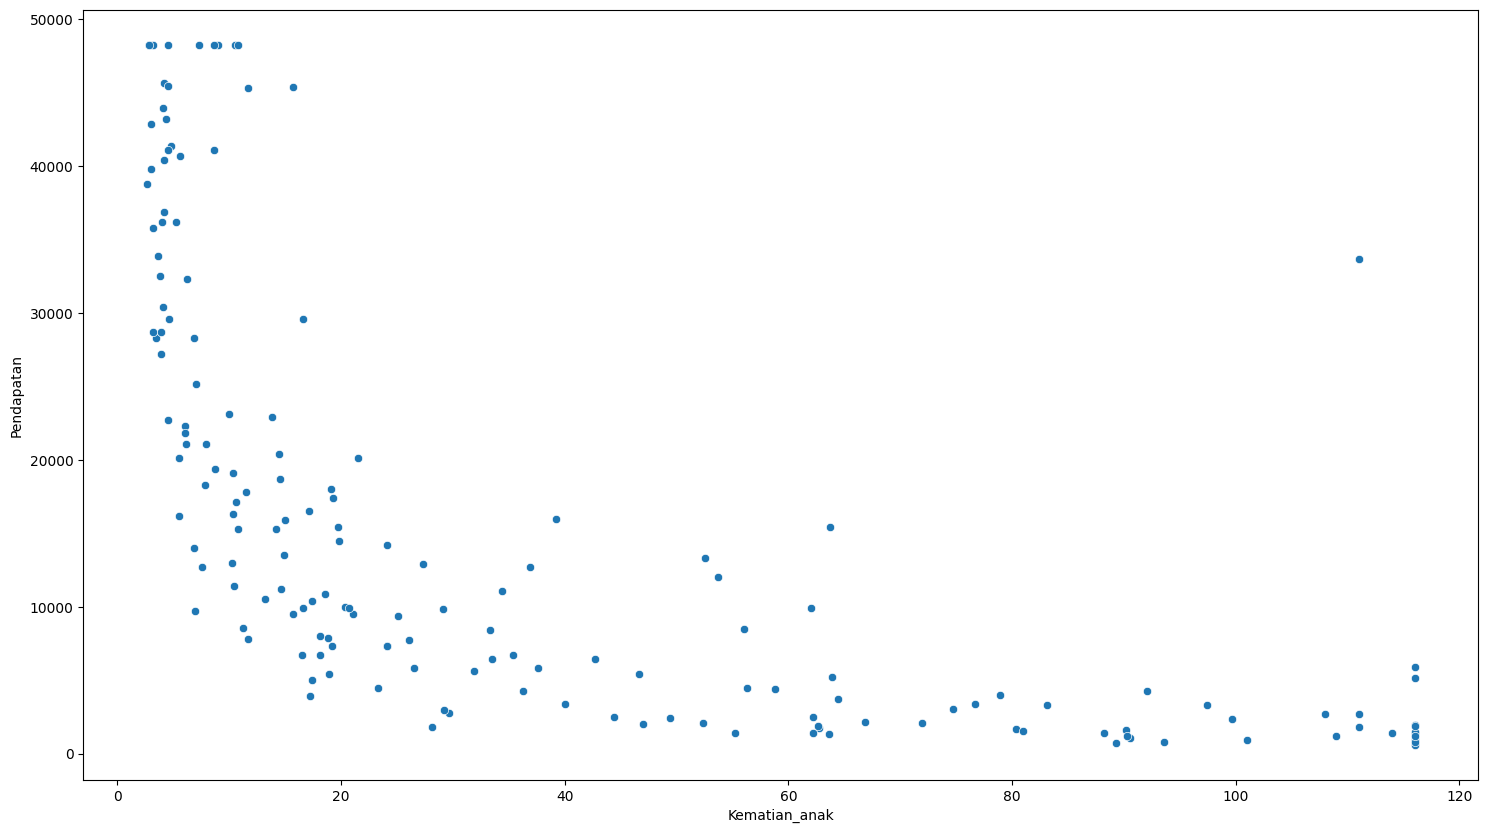

In [128]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='Kematian_anak', y='Pendapatan', data=df)
plt.show()

Analysis :     
This graph shows that the higher the income, the lower the number of child deaths. Vice versa, the higher the child mortality rate, the lower the income rate.

## 3. Clustering

In [129]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
df_scaled = scaler.fit_transform(df.astype(float))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

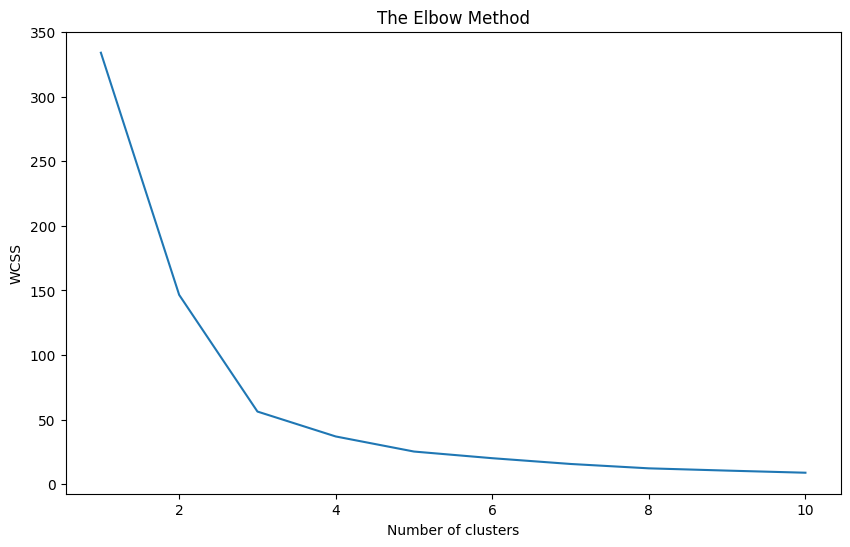

In [130]:
# Choose cluster using elbow
plt.figure(figsize=(10,6))
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [131]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [132]:
new = pd.DataFrame(data=df_scaled, columns=['Kematian_anak', 'Pendapatan'])
new['label_kmeans']=labels

In [133]:
df_scaled_original = scaler.inverse_transform(df_scaled)
df_original = pd.DataFrame(df_scaled_original, columns=df.columns)

centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

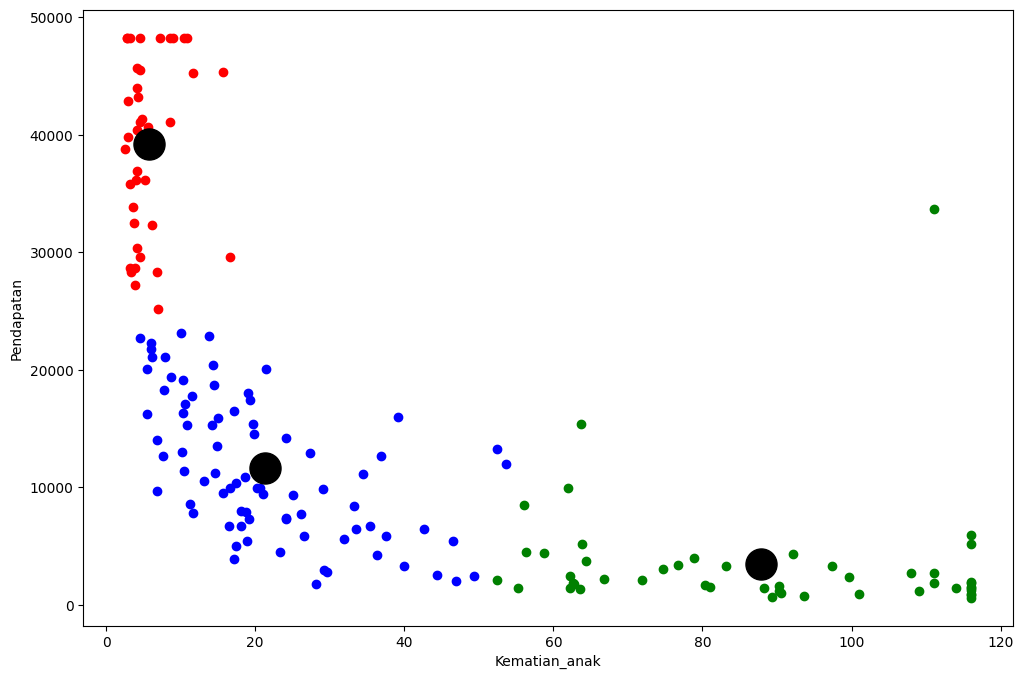

In [134]:
plt.figure(figsize=(12,8))
plt.scatter(df_original.Kematian_anak[new.label_kmeans == 0], df_original['Pendapatan'][new.label_kmeans == 0], c='blue')
plt.scatter(df_original.Kematian_anak[new.label_kmeans == 1], df_original['Pendapatan'][new.label_kmeans == 1], c='red')
plt.scatter(df_original.Kematian_anak[new.label_kmeans == 2], df_original['Pendapatan'][new.label_kmeans == 2], c='green')


plt.scatter(centers_original[:, 0], centers_original[:, 1], c='black', s=500)
plt.xlabel('Kematian_anak')
plt.ylabel('Pendapatan')
plt.show()

Analysis :

The data frame was scaled to equalize the value to make it easier to do clustering. Determining the number of clustering is done with elbows, so 3 clusters are found. Before clustering, the data is returned to the initial data before scaling so that the clustering results display the original data. From the clustering results, there are 3 labels, namely high income with low child mortality (good), low income with low child mortality (moderate), and low income with high child mortality (bad).

## 4. Recommendation


In [135]:
klaster_fokus = 2
negara_cluster_2 = df_ori[labels== klaster_fokus]['Negara']
negara_cluster_2

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
107     

In [136]:
klaster_fokus = 2
country_cluster_2 = df_ori[labels == klaster_fokus]

country_cluster_2_sorted = country_cluster_2.sort_values(by=['Pendapatan', 'Kematian_anak'], ascending=[True, False])
recommend_country = country_cluster_2_sorted.head(5)['Negara']

print(recommend_country)


37             Congo, Dem. Rep.
88                      Liberia
26                      Burundi
112                       Niger
31     Central African Republic
Name: Negara, dtype: object


Analysis :    
Clusters with label 2 have the proper criteria to become delegates for providing financial assistance. Countries in this cluster are ranked by lowest income and highest death rate. Following are recommendations for 5 countries eligible to receive financial aid, namely Congo, Dem. Rep., Liberia, Burundi, Niger, and Central African Republic.